In [0]:
# https://pypi.python.org/pypi/pydot
!apt-get -qq install -y graphviz && pip install -q pydot
import pydot

**Lets load various relevant Libraries.We will later make decison tree to classify and players based on certain features.**

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


**Loading the Dataset**


In [0]:
url = 'https://raw.githubusercontent.com/shanksghub/FootballStats/master/FootballStats.csv'
df = pd.read_csv(url)
# Dataset is now stored in a Pandas Dataframe

In [25]:
df.head()

,name,position,appearances,goals,tackles,passes,assists,shots,hit woordwork,crosses,blocks,clearances,headed clearances,clean sheets,saves,punches,goals conceded,yellow cards,red cards,fouls,offsides
0,Sergio Agüero,Forward,23,17,16,538.0,6,84,5,7,20,3,0,0,0,0,3,0.0,15.0,18.0,0.0
1,Aymeric Laporte,Defender,27,2,30,2313.0,1,0,0,6,69,12,0,0,0,3,0,19.0,2.0,0.0,0.0
2,Mohamed Salah,Forward,26,17,13,739.0,7,87,1,49,21,4,1,0,0,0,0,0.0,0.0,20.0,21.0
3,Pierre-Emerick Aubameyang,Forward,25,15,19,518.0,4,63,3,26,13,15,4,0,0,0,0,0.0,0.0,11.0,17.0
4,Harry Kane,Forward,22,14,7,446.0,4,77,1,9,18,11,9,0,0,0,0,4.0,0.0,23.0,7.0



**Statistics of Dataset.**



In [26]:
df.describe()


,appearances,goals,tackles,passes,assists,shots,hit woordwork,crosses,blocks,clearances,headed clearances,clean sheets,saves,punches,goals conceded,yellow cards,red cards,fouls,offsides
count,46.000000,46.000000,46.000000,45.000000,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000,45.000000,44.000000,42.000000,24.000000
mean,24.521739,5.000000,68.086957,862.822222,29.043478,23.695652,2.826087,20.630435,22.173913,41.652174,17.565217,3.543478,13.347826,6.608696,12.282609,2.111111,7.136364,11.809524,4.625000
std,2.438024,5.420127,308.964495,409.217007,124.664342,31.973510,9.153759,39.234542,37.806116,56.184307,31.133870,10.980197,27.638313,11.509374,16.991060,3.399346,10.538061,12.229987,7.654567
min,17.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,23.000000,0.000000,7.500000,633.000000,0.000000,0.000000,0.000000,0.250000,0.000000,1.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.250000,0.000000
50%,25.500000,3.000000,23.500000,748.000000,1.000000,0.500000,0.500000,6.500000,7.000000,13.000000,0.000000,0.000000,0.000000,0.000000,2.000000,1.000000,0.000000,9.000000,1.000000
75%,26.000000,9.750000,34.500000,1153.000000,4.000000,53.500000,1.000000,21.250000,21.000000,61.250000,11.250000,4.000000,0.000000,7.750000,27.250000,3.000000,15.000000,20.750000,5.500000
max,27.000000,17.000000,2115.000000,2313.000000,691.000000,93.000000,58.000000,197.000000,143.000000,175.000000,97.000000,72.000000,93.000000,47.000000,55.000000,19.000000,33.000000,40.000000,28.000000


**Drop certain features.We will classify based on goals,tackles ,passes and shots**

In [0]:
df = df.drop(['appearances','hit woordwork','crosses','assists','name','blocks','fouls','goals conceded','headed clearances','clearances','saves','punches','yellow cards','red cards','offsides','clean sheets'],axis=1)



In [28]:
df.describe()

,goals,tackles,passes,shots
count,46.000000,46.000000,45.000000,46.000000
mean,5.000000,68.086957,862.822222,23.695652
std,5.420127,308.964495,409.217007,31.973510
min,0.000000,0.000000,1.000000,0.000000
25%,0.000000,7.500000,633.000000,0.000000
50%,3.000000,23.500000,748.000000,0.500000
75%,9.750000,34.500000,1153.000000,53.500000
max,17.000000,2115.000000,2313.000000,93.000000


In [0]:
df = df.dropna(axis = 0, how ='any') 


In [30]:
>>> df.fillna(0)


,position,goals,tackles,passes,shots
0,Forward,17,16,538.0,84
1,Defender,2,30,2313.0,0
2,Forward,17,13,739.0,87
3,Forward,15,19,518.0,63
4,Forward,14,7,446.0,77
5,Forward,12,9,1273.0,67
6,Forward,12,30,789.0,8
7,Forward,12,22,920.0,3
8,Forward,10,28,551.0,49
9,Forward,10,18,744.0,93


**Train test Split**

In [0]:
from sklearn.model_selection import train_test_split

In [0]:
X = df.drop('position',axis=1)
y = df['position']

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

**Import Decision Tree Classifier**

In [0]:
from sklearn.tree import DecisionTreeClassifier

In [0]:
dtree = DecisionTreeClassifier()

In [36]:
>>> df.fillna(0)


,position,goals,tackles,passes,shots
0,Forward,17,16,538.0,84
1,Defender,2,30,2313.0,0
2,Forward,17,13,739.0,87
3,Forward,15,19,518.0,63
4,Forward,14,7,446.0,77
5,Forward,12,9,1273.0,67
6,Forward,12,30,789.0,8
7,Forward,12,22,920.0,3
8,Forward,10,28,551.0,49
9,Forward,10,18,744.0,93


**Decision Tree Classifier.**

In [37]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [0]:
predictions = dtree.predict(X_test)

In [0]:
from sklearn.metrics import classification_report,confusion_matrix

In [40]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

    Defender       0.83      1.00      0.91         5
     Forward       1.00      0.80      0.89         5
  Goalkeeper       1.00      1.00      1.00         3
  Midfielder       1.00      1.00      1.00         1

    accuracy                           0.93        14
   macro avg       0.96      0.95      0.95        14
weighted avg       0.94      0.93      0.93        14



In [41]:
print(confusion_matrix(y_test,predictions))

[[5 0 0 0]
 [1 4 0 0]
 [0 0 3 0]
 [0 0 0 1]]


**Decision Tree Display.**

In [42]:
from IPython.display import Image  
from sklearn.externals.six import StringIO  
from sklearn.tree import export_graphviz
import pydot 

features = list(df.columns[1:])
features

['goals', 'tackles', 'passes', 'shots']

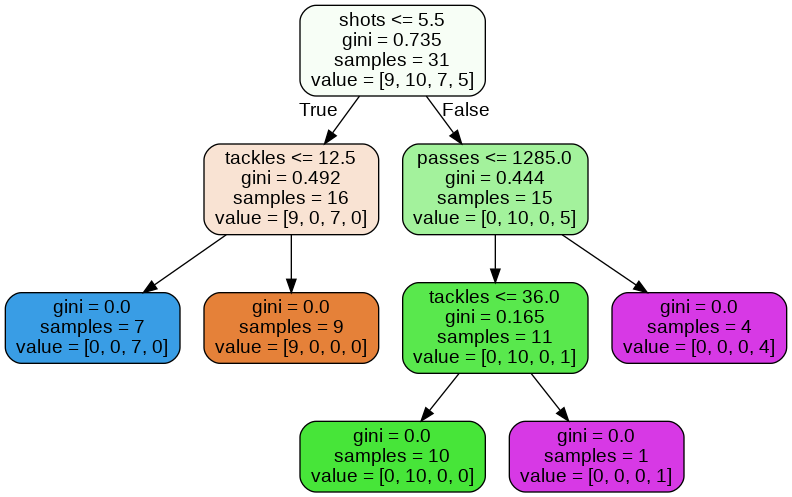

In [43]:
dot_data = StringIO()  
export_graphviz(dtree, out_file=dot_data,feature_names=features,filled=True,rounded=True)

graph = pydot.graph_from_dot_data(dot_data.getvalue())  
Image(graph[0].create_png())  


**Random Forest Confusion Matrix and Classification Report**.
*






In [44]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [0]:
rfc_pred = rfc.predict(X_test)

In [46]:
print(confusion_matrix(y_test,rfc_pred))

[[5 0 0 0]
 [1 4 0 0]
 [0 0 3 0]
 [0 0 0 1]]


In [47]:
print(classification_report(y_test,rfc_pred))

              precision    recall  f1-score   support

    Defender       0.83      1.00      0.91         5
     Forward       1.00      0.80      0.89         5
  Goalkeeper       1.00      1.00      1.00         3
  Midfielder       1.00      1.00      1.00         1

    accuracy                           0.93        14
   macro avg       0.96      0.95      0.95        14
weighted avg       0.94      0.93      0.93        14



We can see the classification report has good accuracy and recall.